In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
from trojan_defender.poison import patch
from trojan_defender import plot, datasets

/Users/Edu/miniconda3/envs/trojan/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
input_shape_grayscale = (10, 10, 1)
input_shape_rgb = (10, 10, 3)

## Masks

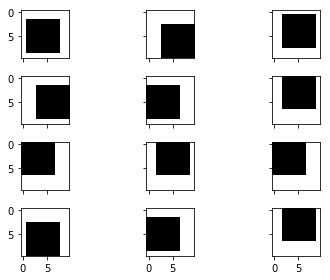

In [17]:
maker = patch.block_mask_maker(0.5, dynamic=True,
                               input_shape=input_shape_grayscale)

plot.grid([maker() for _ in range(12)])

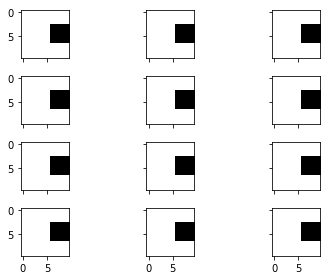

In [18]:
maker = patch.block_mask_maker(0.2, dynamic=False,
                               input_shape=input_shape_grayscale)

plot.grid([maker() for _ in range(12)])

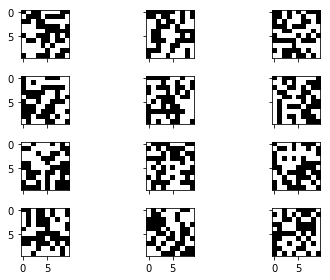

In [19]:
maker = patch.sparse_mask_maker(0.5, dynamic=True,
                               input_shape=input_shape_grayscale)

plot.grid([maker() for _ in range(12)])

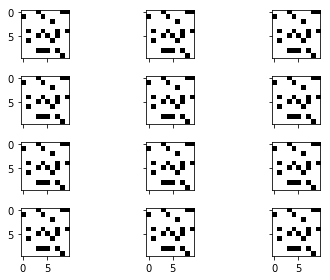

In [20]:
maker = patch.sparse_mask_maker(0.2, dynamic=False,
                               input_shape=input_shape_grayscale)

plot.grid([maker() for _ in range(12)])

## Patches

### Block patches

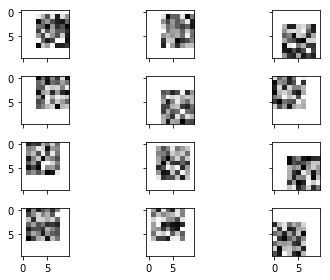

In [22]:
p = patch.Patch('block', proportion=0.5,
                input_shape=input_shape_grayscale,
                dynamic_mask=True, dynamic_pattern=True)
plot.grid([p() for _ in range(12)])

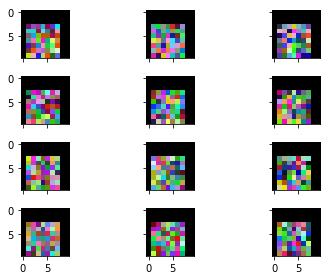

In [23]:
p = patch.Patch('block', proportion=0.5,
                input_shape=input_shape_rgb,
                dynamic_mask=False, dynamic_pattern=True)
plot.grid([p() for _ in range(12)])

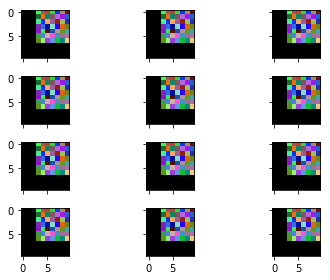

In [24]:
p = patch.Patch('block', proportion=0.5,
                input_shape=input_shape_rgb,
                dynamic_mask=False, dynamic_pattern=False)
plot.grid([p() for _ in range(12)])

### Sparse patches

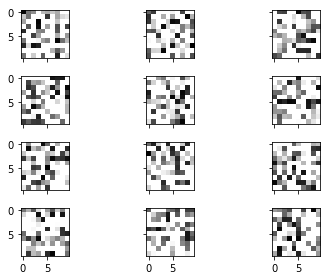

In [25]:
p = patch.Patch('sparse', proportion=0.5,
                input_shape=input_shape_grayscale,
                dynamic_mask=True, dynamic_pattern=True)
plot.grid([p() for _ in range(12)])

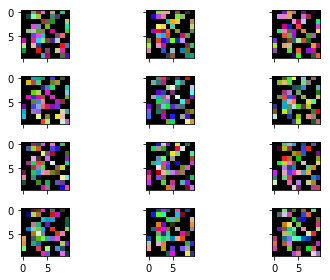

In [26]:
p = patch.Patch('sparse', proportion=0.5,
                input_shape=input_shape_rgb,
                dynamic_mask=False, dynamic_pattern=True)
plot.grid([p() for _ in range(12)])

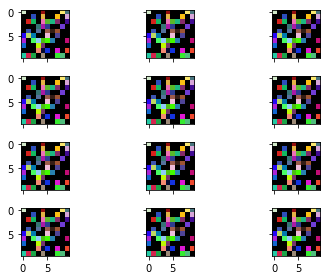

In [27]:
p = patch.Patch('sparse', proportion=0.5,
                input_shape=input_shape_rgb,
                dynamic_mask=False, dynamic_pattern=False)
plot.grid([p() for _ in range(12)])